# <font color=blue>Assignments for "Making Predictions"</font>

In this exercise, you'll predict house prices using your model. To complete this assignment, submit a link to a Jupyter notebook containing your solutions to the following tasks:

- Load the **houseprices** data from Kaggle
- Split your data into train and test sets.
- Estimate your model from the previous lesson in the train set. Assess the goodness of fit of your model.
- Predict the house prices in the test set and evaluate the performance of your model using the metrics we mentioned in this lesson.
- Is the performance of your model satisfactory? Why?
- Try to improve your model in terms of prediction performance by adding or removing some variables.

In [92]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.api.types import is_numeric_dtype
from sklearn import metrics
import math
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
df=pd.read_csv("E:/user/Notebooks/data/house-prices/train.csv", low_memory=False)



In [93]:
def display_all(df):
    with pd.option_context("display.max_rows", 1000, "display.max_columns", 1000): 
        display(df)

In [94]:
display_all(df.isnull().sum().sort_index()*100/len(df))

1stFlrSF          0.000000
2ndFlrSF          0.000000
3SsnPorch         0.000000
Alley            93.767123
BedroomAbvGr      0.000000
BldgType          0.000000
BsmtCond          2.534247
BsmtExposure      2.602740
BsmtFinSF1        0.000000
BsmtFinSF2        0.000000
BsmtFinType1      2.534247
BsmtFinType2      2.602740
BsmtFullBath      0.000000
BsmtHalfBath      0.000000
BsmtQual          2.534247
BsmtUnfSF         0.000000
CentralAir        0.000000
Condition1        0.000000
Condition2        0.000000
Electrical        0.068493
EnclosedPorch     0.000000
ExterCond         0.000000
ExterQual         0.000000
Exterior1st       0.000000
Exterior2nd       0.000000
Fence            80.753425
FireplaceQu      47.260274
Fireplaces        0.000000
Foundation        0.000000
FullBath          0.000000
Functional        0.000000
GarageArea        0.000000
GarageCars        0.000000
GarageCond        5.547945
GarageFinish      5.547945
GarageQual        5.547945
GarageType        5.547945
G

In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [96]:
df=df.drop(['PoolQC','MiscFeature','Fence','Alley'], axis=1)

In [97]:
display_all(df.nunique())

Id               1460
MSSubClass         15
MSZoning            5
LotFrontage       110
LotArea          1073
Street              2
LotShape            4
LandContour         4
Utilities           2
LotConfig           5
LandSlope           3
Neighborhood       25
Condition1          9
Condition2          8
BldgType            5
HouseStyle          8
OverallQual        10
OverallCond         9
YearBuilt         112
YearRemodAdd       61
RoofStyle           6
RoofMatl            8
Exterior1st        15
Exterior2nd        16
MasVnrType          4
MasVnrArea        327
ExterQual           4
ExterCond           5
Foundation          6
BsmtQual            4
BsmtCond            4
BsmtExposure        4
BsmtFinType1        6
BsmtFinSF1        637
BsmtFinType2        6
BsmtFinSF2        144
BsmtUnfSF         780
TotalBsmtSF       721
Heating             6
HeatingQC           5
CentralAir          2
Electrical          5
1stFlrSF          753
2ndFlrSF          417
LowQualFinSF       24
GrLivArea 

In [98]:
df.HouseStyle.unique()

array(['2Story', '1Story', '1.5Fin', '1.5Unf', 'SFoyer', 'SLvl', '2.5Unf',
       '2.5Fin'], dtype=object)

In [99]:

def make_discrete(HouseStyle):
    if HouseStyle == '2Story':
        return 1
    elif HouseStyle == '1Story':
        return 2
    elif HouseStyle =='1.5Fin':
        return 3
    elif HouseStyle =='1.5Unf':
        return 4
    elif HouseStyle =='SFoyer':
        return 5
    elif HouseStyle =='SLvl':
        return 6
    elif HouseStyle =='2.5Unf':
        return 7
    elif HouseStyle =='2.5Fin':
        return 8


In [100]:
df['HouseStyle'] = df['HouseStyle'].apply(make_discrete)

In [101]:
def fix_missing(df, col, name):
    if is_numeric_dtype(col):
        df[name] = col.fillna(col.median())    
for n, c in df.items():
        fix_missing(df, c, n)

In [102]:
from sklearn import linear_model

# Y is the target variable
Y = df['SalePrice']
# X is the feature set which includes
# is_male and is_smoker variables
X = df[["YearBuilt","TotalBsmtSF",
                 "1stFlrSF",'GrLivArea','OverallQual','GarageCars','HouseStyle']]

In [103]:
X_train, X_test, y_train, y_test =  train_test_split(X, Y, test_size=0.20, random_state=111)

In [104]:
X_train = sm.add_constant(X_train)

# We fit an OLS model using statsmodels
results = sm.OLS(y_train, X_train).fit()

# We print the summary results
display(results.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.756
Model:                            OLS   Adj. R-squared:                  0.755
Method:                 Least Squares   F-statistic:                     513.4
Date:                Thu, 24 Sep 2020   Prob (F-statistic):               0.00
Time:                        15:16:25   Log-Likelihood:                -13988.
No. Observations:                1168   AIC:                         2.799e+04
Df Residuals:                    1160   BIC:                         2.803e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -6.874e+05   9.92e+04     -6.931      0.000   -8.82e+05   -4.93e+05
YearBuilt     310.7587     51.766      6.003      0.000     209.193     412.324
TotalBsmtSF    14.6470      4.794      3.055      0.002       5.241      24.053
1stFlrSF       18.0111      5.719      3.149      0.002       6.789      29.233
GrLivArea      43.8245      3.109     14.098      0.000      37.725      49.924
OverallQual  2.095e+04   1299.250     16.123      0.000    1.84e+04    2.35e+04
GarageCars   1.438e+04   2069.504      6.950      0.000    1.03e+04    1.84e+04
HouseStyle   -495.8755    925.006     -0.536      0.592   -2310.747    1318.996
==============================================================================
Omnibus:                      346.787   Durbin-Watson:                   1.914
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            28478.744
Skew:                          -0.341   Prob(JB):                         0.00
Kurtosis:                      27.181   Cond. No.                     2.62e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.62e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

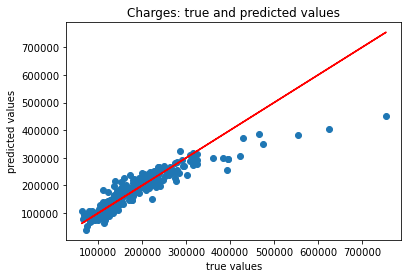

Mean absolute error of the prediction is: 22936.291509739665
Mean squared error of the prediction is: 1403316894.9442208
Root mean squared error of the prediction is: 37460.87151874901
Mean absolute percentage error of the prediction is: 12.563319912198647


In [105]:
from statsmodels.tools.eval_measures import mse, rmse
# We add constant to the model as it's a best practice
# to do so everytime!
X_test = sm.add_constant(X_test)

# We are making predictions here
y_preds = results.predict(X_test)

plt.scatter(y_test, y_preds)
plt.plot(y_test, y_test, color="red")
plt.xlabel("true values")
plt.ylabel("predicted values")
plt.title("Charges: true and predicted values")
plt.show()

print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_test, y_preds)))
print("Mean squared error of the prediction is: {}".format(mse(y_test, y_preds)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test, y_preds)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_preds) / y_test)) * 100))

In [106]:
df['OverallQual*GrLivArea']=df.OverallQual*df.GrLivArea
df['TotalBsmtSF*1stFlrSF']=df.TotalBsmtSF*df['1stFlrSF']
X = df[["YearBuilt","TotalBsmtSF",
                 "1stFlrSF",'OverallQual','GarageCars','OverallQual*GrLivArea','TotalBsmtSF*1stFlrSF']]

X_train, X_test, y_train, y_test =  train_test_split(X, Y, test_size=0.20, random_state=111)

X_train = sm.add_constant(X_train)

# We fit an OLS model using statsmodels
results = sm.OLS(y_train, X_train).fit()

# We print the summary results
display(results.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.805
Model:                            OLS   Adj. R-squared:                  0.803
Method:                 Least Squares   F-statistic:                     681.9
Date:                Thu, 24 Sep 2020   Prob (F-statistic):               0.00
Time:                        15:16:26   Log-Likelihood:                -13858.
No. Observations:                1168   AIC:                         2.773e+04
Df Residuals:                    1160   BIC:                         2.777e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                 -7.391e+05   8.56e+04     -8.639      0.000   -9.07e+05   -5.71e+05
YearBuilt               351.7481     45.217      7.779      0.000     263.032     440.464
TotalBsmtSF              77.5462      6.048     12.821      0.000      65.679      89.413
1stFlrSF                 47.7514      5.268      9.065      0.000      37.416      58.086
OverallQual            5413.1798   1512.219      3.580      0.000    2446.189    8380.171
GarageCars             9879.2709   1873.404      5.273      0.000    6203.631    1.36e+04
OverallQual*GrLivArea     8.8140      0.403     21.886      0.000       8.024       9.604
TotalBsmtSF*1stFlrSF     -0.0348      0.002    -15.623      0.000      -0.039      -0.030
==============================================================================
Omnibus:                      307.426   Durbin-Watson:                   1.908
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            10063.485
Skew:                           0.520   Prob(JB):                         0.00
Kurtosis:                      17.342   Cond. No.                     1.57e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.57e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

p value of HouseStyle,GrLivArea because not smaller than 0.05 hence I removed these features.

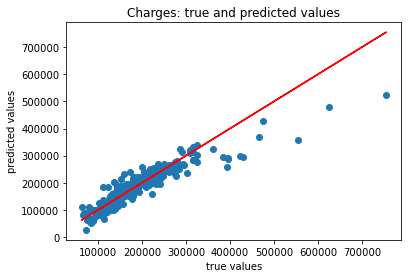

Mean absolute error of the prediction is: 22138.054813134026
Mean squared error of the prediction is: 1215813607.6533713
Root mean squared error of the prediction is: 34868.518862340155
Mean absolute percentage error of the prediction is: 12.280134542948339


In [107]:
X_test = sm.add_constant(X_test)

# We are making predictions here
y_preds = results.predict(X_test)

plt.scatter(y_test, y_preds)
plt.plot(y_test, y_test, color="red")
plt.xlabel("true values")
plt.ylabel("predicted values")
plt.title("Charges: true and predicted values")
plt.show()

print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_test, y_preds)))
print("Mean squared error of the prediction is: {}".format(mse(y_test, y_preds)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test, y_preds)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_preds) / y_test)) * 100))

Error values of model decreased so model improved